# 10 Streamline your code


In [113]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd

pd.set_option("display.max.columns", None) # When display data, display all columns - don't cut off df 


In [114]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop the first column 
power_plants = power_plants.drop(columns='Unnamed: 0')

# Simplify columns names 
power_plants.columns = power_plants.columns.str.lower()

power_plants.head()


,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [115]:
# Import states data
fp = os.path.join('data','2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to `geopandas.GeoDataFrame`

'geopandas' doesny have a way to extract a geometry column from CSV. So we need to specify this manuyally. 

WE will use the long and lat columns in the cSV these indicate the long of power

In [116]:
# Create point from lat and long 
points = gpd.points_from_xy(power_plants.longitude, # Creates an array of points 
                   power_plants.latitude)



In [117]:
# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,  # Data 
                 geometry= points,  # Specify geometry column 
                 crs = 'EPSG:4269') # Specify CRS 

<Axes: >

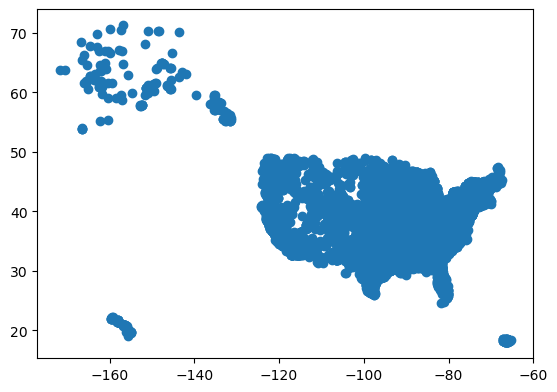

In [118]:
power_plants.plot()

## f-string 
WE have print vairables useing string concaterantion inside 'pinrt()' functuin `

In [119]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269



FORMAT: 
f " some text {replace}"


In [120]:
# Basic printing with f strings
print(f"CRS: {power_plants.crs}")
print(f"elliposde: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

CRS: EPSG:4269
elliposde: GRS 1980
datum: North American Datum 1983


In [121]:
# Spacing with 25 characters inbetween by using {} and ": < 25"
print(f"{'Is the CRS Geographic?' : <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?' : <25} {power_plants.crs.is_projected}")

Is the CRS Geographic?    True
Is the CRS projected?     False


## Explore the TIGER shapefile 

Pelimieray data exploration

In [122]:
states.tail()


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

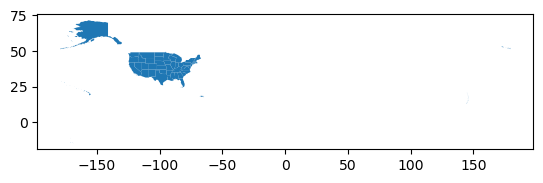

In [123]:
print(states.crs)
states.plot()

## 'for' loops

It can be easier to work with codes as number instead od strings, lets update the corresponding columns in teh states geo-dataframe 


In [124]:
print( f"region is string dtype? {is_string_dtype(states['REGION'])}" )
print( f"division is string dtype? {is_string_dtype(states['DIVISION'])}" )
print( f"statefp is string dtype? {is_string_dtype(states['STATEFP'])}" )

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


CONVIENT CODE becayse repreats same code.... 
Can use a for-loop

In [125]:
code_cols = ['REGION', 'DIVISION', 'STATEFP']

# Check whether codes are stingd for each column 
for columns in code_cols: 
    print(columns)

for columns in code_cols: 
    print( f"{columns} is string dtype? {is_string_dtype(states[columns])}" )



REGION
DIVISION
STATEFP
REGION is string dtype? True
DIVISION is string dtype? True
STATEFP is string dtype? True


**Dry code**

CRY = dont repeat yourself 

Core programing princuples that encoruages reducing reduncancy and consoliating repreated logic.

If you need to preate the "same" code more than twice, you probably need a for loop. 

## `assert`
the `assert` keyword foes nothing if the expression next t it evaulated the `True` and it raises an asstion Error expection ans stopes your deofr from running futher is not. 

WE use it to intergrate tests unto your code 


In [126]:
# Does nothing is statement is true 
assert 2+2 ==4 

# Raise an error is statment is false 
assert 2+2 ==3 

AssertionError: 

A workflow for updating the dtatatypes of code columns to intgers : 

for each column in code_columns: 
    convert column to numeric
    check if column is numeric using assert 

In [ ]:
# Update code columns into integers 
for column in code_cols: 
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Produces an error if statement is false as

# Data Selection 
Use only datya from contigous states. Data covers a bigger extension. 

<Axes: >

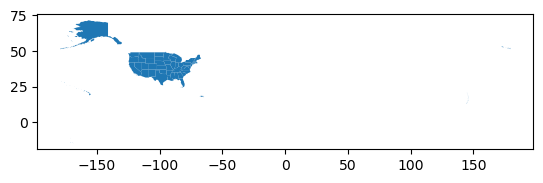

In [ ]:
states.plot()

# Check in  
1) What are the unqiue values for region, divisions, or states codes in the data? 

2) Which codes should we selecyted to only keep states in the contiguous US? 

In [ ]:
states.columns
print(states['REGION'].unique())
print(states['DIVISION'].unique())
print(states['STATEFP'].unique()) # state fp and geoid are the same thing... 
print(states['GEOID'].unique())


['3' '2' '1' '4' '9']
['5' '3' '4' '1' '8' '9' '2' '7' '6' '0']
['54' '12' '17' '27' '24' '44' '16' '33' '37' '50' '09' '10' '35' '06'
 '34' '55' '41' '31' '42' '53' '22' '13' '01' '49' '39' '48' '08' '45'
 '40' '47' '56' '15' '38' '21' '78' '69' '66' '23' '36' '32' '02' '60'
 '26' '05' '28' '29' '30' '20' '18' '72' '46' '25' '51' '11' '19' '04']
['54' '12' '17' '27' '24' '44' '16' '33' '37' '50' '09' '10' '35' '06'
 '34' '55' '41' '31' '42' '53' '22' '13' '01' '49' '39' '48' '08' '45'
 '40' '47' '56' '15' '38' '21' '78' '69' '66' '23' '36' '32' '02' '60'
 '26' '05' '28' '29' '30' '20' '18' '72' '46' '25' '51' '11' '19' '04']


In [ ]:
states[['NAME', 'REGION','DIVISION', 'GEOID', 'STATEFP']].value_counts()
# Want to get ride of region 9 or division 0 
# Hawaii ad Alaksa have coes 2 and 15 



NAME                                          REGION  DIVISION  GEOID  STATEFP
Alabama                                       3       6         01     01         1
Alaska                                        4       9         02     02         1
Nebraska                                      2       4         31     31         1
Nevada                                        4       8         32     32         1
New Hampshire                                 1       1         33     33         1
New Jersey                                    1       2         34     34         1
New Mexico                                    4       8         35     35         1
New York                                      1       2         36     36         1
North Carolina                                3       5         37     37         1
North Dakota                                  2       4         38     38         1
Ohio                                          2       3         39     39        

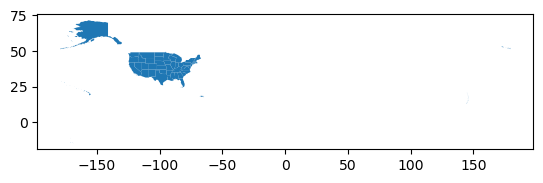

In [ ]:
contigious = states[ (states.REGION != 9 ) & (~states.STATEFP.isin([2,15])) ]
contigious.plot() 

contigious = states

# The ~ symbol is used to negate a statement 

## Check in 

Select the data in the `power_plants` df for the contigius US states 

<Axes: >

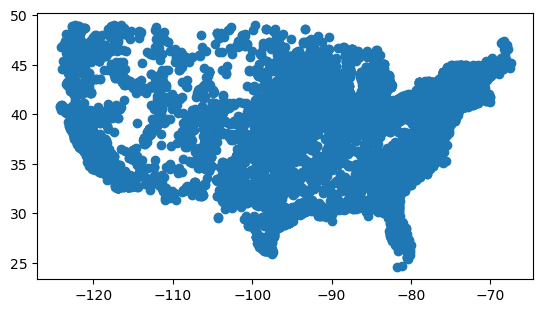

In [ ]:
power_plants.head()
power_plants['state'].unique()

power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]


power_plants.plot()


## Plotting 

In [ ]:
contigious.crs == power_plants.crs

True

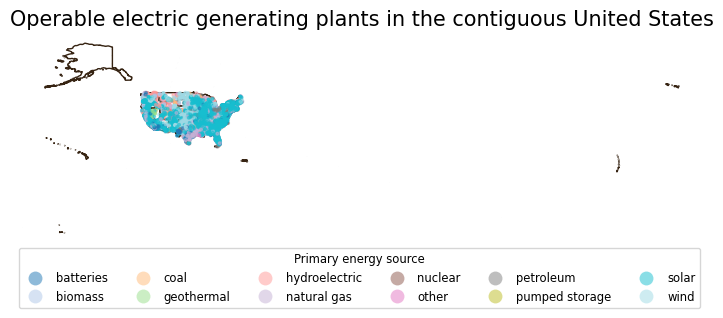

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contigious.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

In [ ]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

print('\n')  # Blank line

# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1
2
3


1 a
2 b
3 c


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

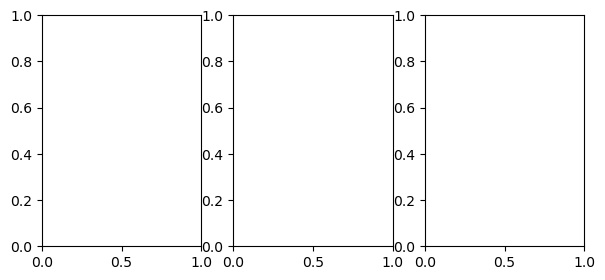

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize= (7,3))

axes

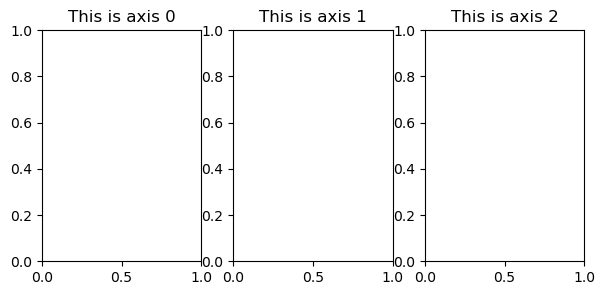

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()


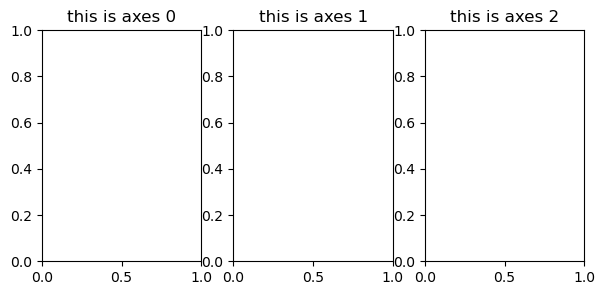

In [ ]:
# Use zip to create the same subplot to reduce redundancy
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))


for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"this is axes {i}")

plt.show()

### Exercise
1) Select the power plants in California in a variable named ca_power_plants.

2) Create a list named top_sources with California’s top 3 electric primary sources.

3) Isolate the California state boundary in a variable named ca_boundary.

4) Recreate the following plot:

In [ ]:
# 1 
ca_power_plants = power_plants[power_plants['state'] == "California"].copy()


In [ ]:
# 2 
top_sources = ['solar', 'natural gas', 'hydroelectric']

In [ ]:
# 3 
ca_boundary = states[states['NAME'] == 'California'].copy()

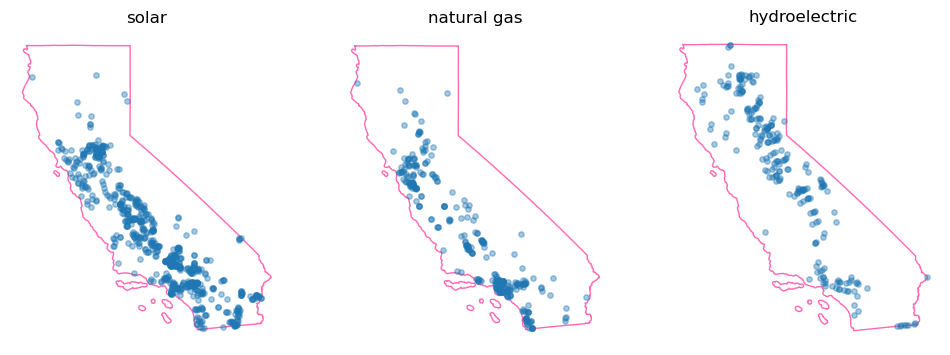

In [ ]:
# 4
fig, ax = plt.subplots(figsize = (12,6), nrows=1, ncols=3)

for ax, i in zip(ax, top_sources):
    ax.set_title(i) # interate titles based on top_source list 

    ax.axis('off')

    ca_boundary.plot(ax=ax, # Does it on each axis 
                    color ='none', 
                    edgecolor = 'hotpink') 
    
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax = ax, 
                                                             markersize= 15
                                                             ,
                                                             alpha = 0.4)
    
plt.show()